In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Importing the datasets

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Lets make a copy of these datasets so that even if we have to make any changes to these datasets we dont have to lose the original ones.

In [3]:
train_original = train.copy()
test_original = test.copy()

### Lets check the datasets

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Now, we will check the features present in our both datasets and then we will look at their data types, shape.

In [6]:
print(train.columns)
print(train.dtypes)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


We have 12 independent variables and 1 target variable i.e. Loan_status

In [7]:
print(test.columns)
print(test.dtypes)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object


Now we can see that train and test data contain all the features except that test doesn't contain our target variable which is Loan_status which we will get using the model built using the train dataset

In [8]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


We have 614 rows, 13 columns in train dataset and 367 rows, 12 columns in test dataset

## Univariate Analysis

First we will look at Target variable. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot

In [9]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
#Normalize can be used to get proportions instead of the numbers
train['Loan_Status'].value_counts(normalize=True) 

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

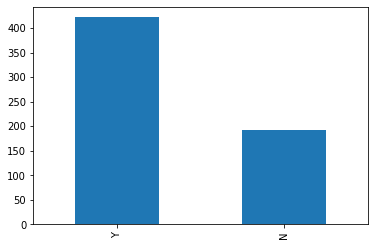

In [11]:
train['Loan_Status'].value_counts().plot.bar()

From the above we can see that Out of 614 people, only 422(around 68.7%) got approval 

Now lets visualize each variable seperately.

### Independent Variable(Categorical)

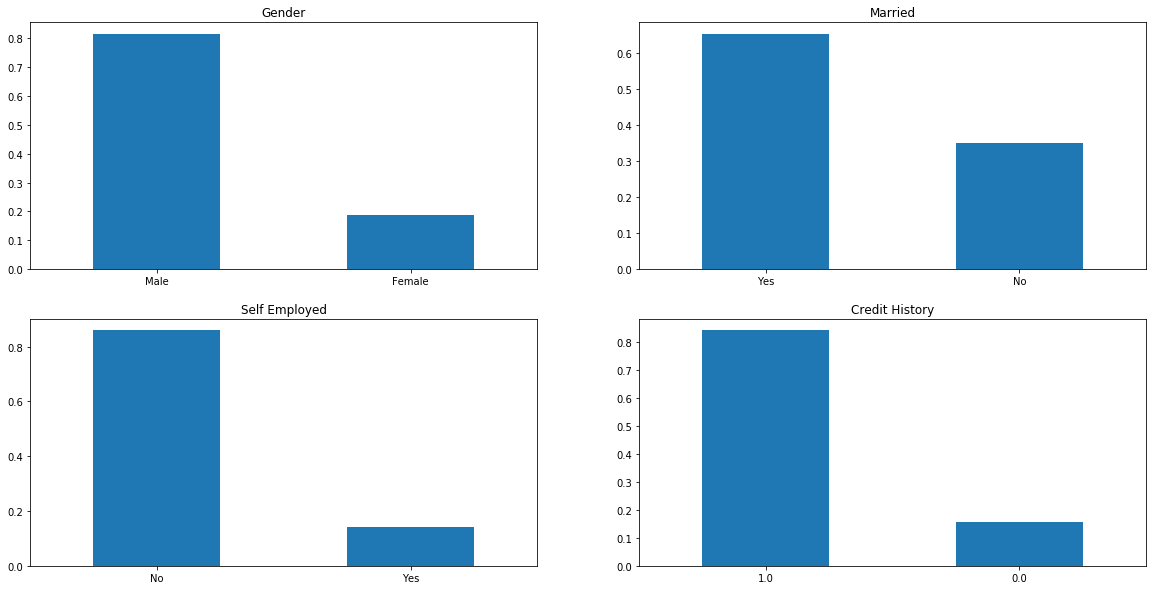

In [12]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title ='Gender')
plt.xticks(rotation=0)

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title ='Married')
plt.xticks(rotation=0)

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title ='Self Employed')
plt.xticks(rotation=0)

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title ='Credit History')
plt.xticks(rotation=0)

plt.show()

It can be inferred from the above bar plots that :

    1. 80% applicants in the dataset are male
    2. Around 65% of the applicants are married.
    3. around 15% of the applicants are self-employed.
    4. Around 85% of the applicants repaid their debt

### Independent Variable(Ordinal)

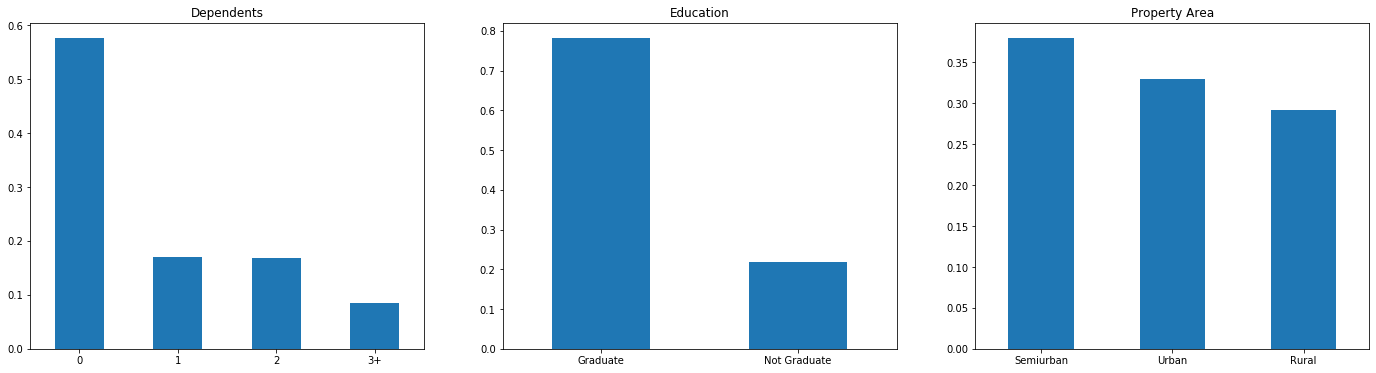

In [13]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title ='Dependents')
plt.xticks(rotation=0)

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title ='Education')
plt.xticks(rotation=0)

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title ='Property Area')
plt.xticks(rotation=0)

plt.show()

It can be inferred from the above bar plots that :

    1. Most of the applicants don't have dependents.
    2. Around 80% of the applicants are graduate
    3. Most of the applicants are from Semiurban area

### Independent Variable(Numerical)

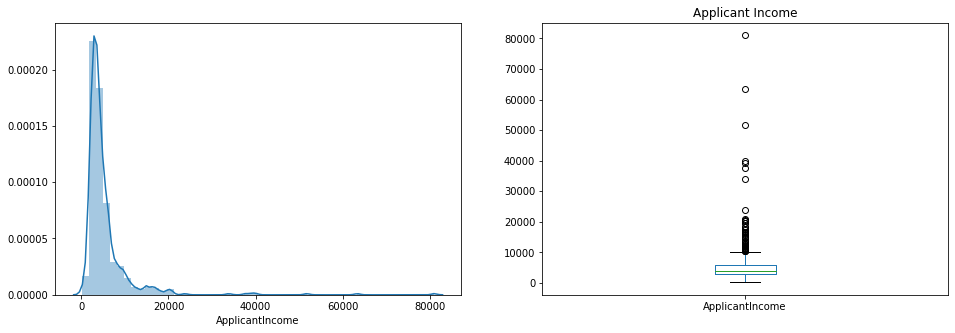

In [14]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5), title ='Applicant Income')
plt.xticks(rotation=0)


plt.show()

It can be inferred that most of the data in distribution of applicant income is towards left which means it is not normally distributed. 

The boxplot confirms the presence of outliers/extreme values.

Text(0.5, 0.98, ' ')

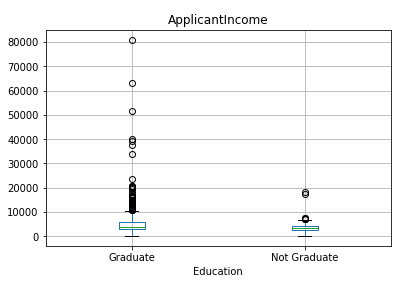

In [15]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle(" ")

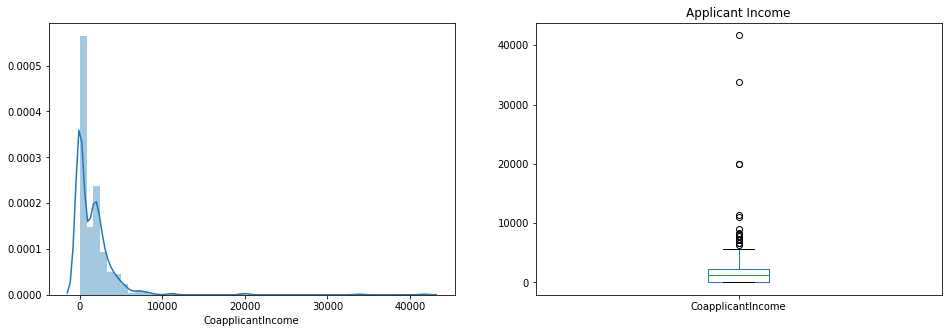

In [16]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5), title ='Applicant Income')
plt.xticks(rotation=0)


plt.show()

We see a similar distribution as that of Applicant Income. Majority of coapplicant's income ranges from 0 to 5000. We can also see lot of outliers and it is also not distributed.

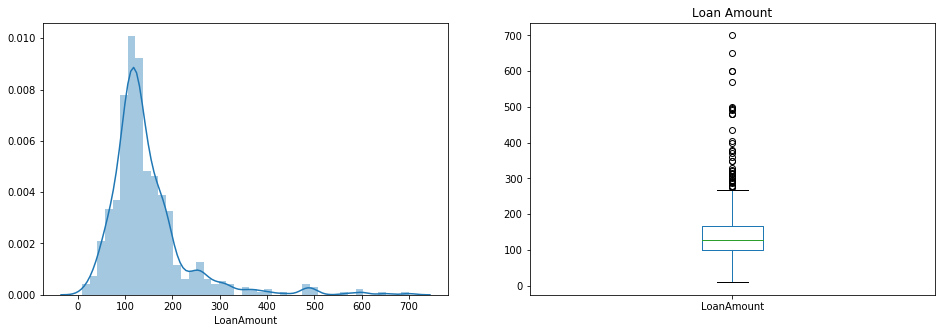

In [17]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(train['LoanAmount'])

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5), title ='Loan Amount')
plt.xticks(rotation=0)


plt.show()

We see a lot of outliers in this too.

## BiVariate Analysis

### Categorical Independent Variable v Target Variable

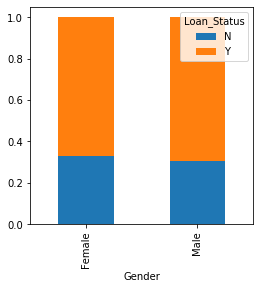

In [18]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

It can be inferred that proportion of male and female applicants is more or less same for both approved and unapproved loans

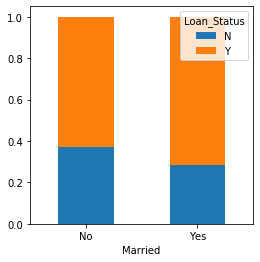

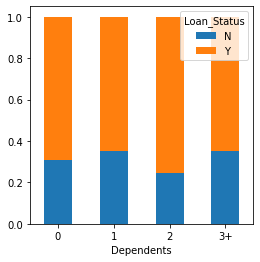

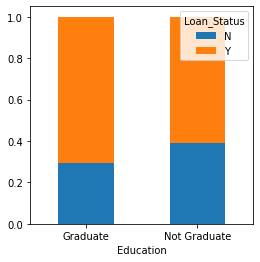

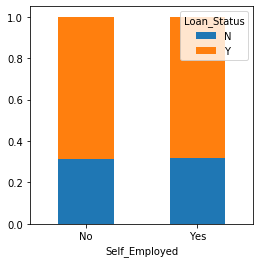

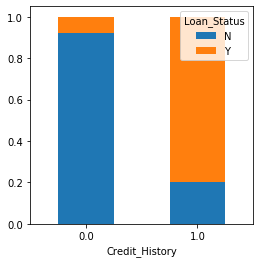

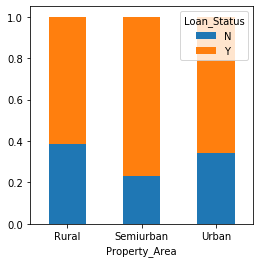

In [19]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])

Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.xticks(rotation=0)
plt.show()

Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.xticks(rotation=0)
plt.show()

Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.xticks(rotation=0)
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.xticks(rotation=0)
plt.show()

Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.xticks(rotation=0)
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.xticks(rotation=0)
plt.show()

It can be inferred that:
    
    1. Proportion of married applicants is higher for approved loans
    2. Distribution of applicants with 1 or 3+ dependents is similar across both categories of loan status
    3. There is nothing significant we can infer from Self Employed plot
    4. It seems people with credit history as 1 are more likely to get their loans approved
    5. Proportion of loans getting approved in semiurban area is higher compared to that in rural or urban areas

### Numerical Independent Variable v Target Variable

(array([0, 1]), <a list of 2 Text xticklabel objects>)

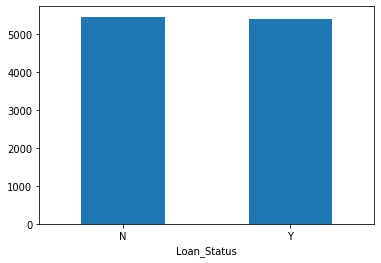

In [20]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.xticks(rotation=0)

Here y-axis reresents the mean applicant Income. We doesnt see any change in the mean income. So, lets make bins for applicant variable income based on values in it and analyze the corresponding loan status for each bin

Text(0, 0.5, 'Percentage')

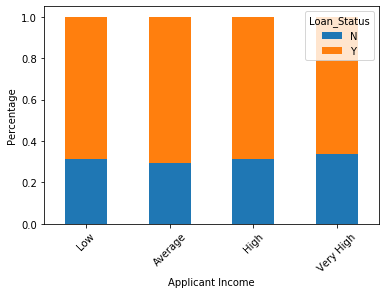

In [21]:
bins = [0, 2500, 4000, 6000, 81000] 
group= ['Low', 'Average', 'High', 'Very High']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked = True)
plt.xticks(rotation=45)
plt.xlabel('Applicant Income')
plt.ylabel('Percentage')

It can be inferred that Applicant Income does not affect the chances of loan approval which directly contradicts our hypothesis in which we assumed that if applicant income is high the chances of loan approval is high

Text(0, 0.5, 'Percentage')

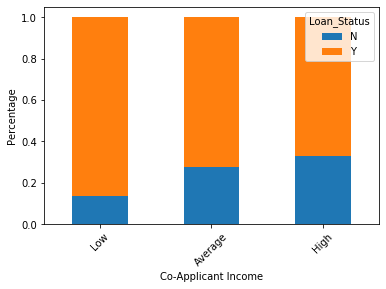

In [22]:
bins = [0, 1000, 3000, 42000] 
group= ['Low', 'Average', 'High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels=group)

Coapplicant_income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_income_bin.div(Coapplicant_income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked = True)
plt.xticks(rotation=45)
plt.xlabel('Co-Applicant Income')
plt.ylabel('Percentage')

It shows that if coapplicant's income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don't have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant's and coapplicant's income to visualize the combined effect of income on loan approval.

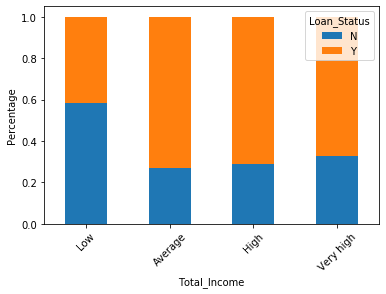

In [23]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

bins=[0,2500, 4000, 6000, 81000] 
group=['Low', 'Average', 'High', 'Very high'] 
train[ 'Total_Income_bin']=pd.cut(train[ 'Total_Income'], bins, labels=group)

Total_Income_bin=pd.crosstab(train ['Total_Income_bin'], train ['Loan_Status'] ) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype (float), axis=0).plot(kind="bar", stacked=True) 
plt.xticks(rotation=45)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

We can see that proportion of loans getting approved having low total Income is very less compared to that of aplicants with Average,High and Very High Income.

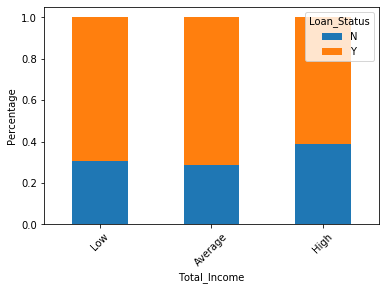

In [24]:
bins=[0,100, 200, 700] 
group=['Low', 'Average', 'High'] 
train[ 'LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'], train ['Loan_Status'] ) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype (float), axis=0).plot(kind="bar", stacked=True) 
plt.xticks(rotation=45)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let's drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable's categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with O and Y with 1.

In [25]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

In [26]:
train = train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'],axis=1)

In [27]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Now lets look at correlation between all numerical variables using heatmap

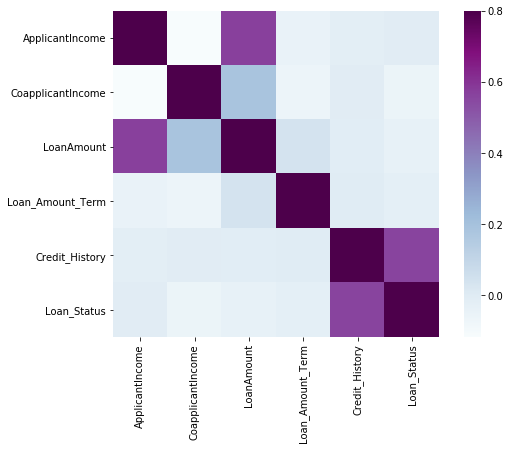

In [28]:
matrix = train.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8, square=True, cmap='BuPu')

We can see that most correlated features are:

    1. ApplicantIncome - LoanAmount
    2. CreditHistory - Loan_Status
    3. LoanAmount - CoapplicantIncome(somewhat)

## Missing Value Imputation

In [29]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self Employed, LoanAmount, Loan Amount Term and Credit History features.

We can consider these methods to fill the missing values:

    For numerical variables: imputation using mean or median
    For categorical variables: imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit History and Self Employed features so we can fill them using the mode of the features.

In [30]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

Now lets try to impute the missing values in Loan-Amount_term. 

In [31]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

As value(360) is repeating the most, we will impute this value in the column

In [32]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [33]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

In [35]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [36]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Outlier Treatment

There will be a significatn effect on mean and standard deviation due to the presence of Outliers. Due to this outliers bulk of the data in the loan amount is at the left and right tail is longer. This is called right skewness. One way to remove skewness is by doing log trransformation. As we take the log transformation, it does not affect the smaller values much, but effects the larger values. So we get a distribution similar to normal distribution 

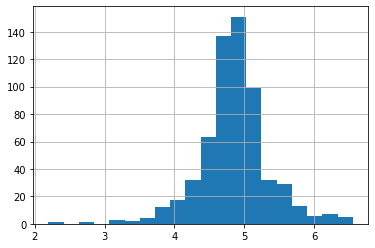

In [37]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Now the distribution looks much normal and effect of extreme values has been significantly subsided. 

### Model building

Lets drop Loan_ID as it doesnt have any effect on Loan Status. So we will remove that coulmn from train and test datasets

In [38]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID', axis=1)

In [39]:
X = train.drop('Loan_Status',axis=1)
Y = train.Loan_Status

Now we will make dummy variables for the categorical variables. Dummy variables turns categorical variables into a series of 0 or 1, making them a lot easier to quantify and compare.

In [40]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [41]:
#splitting our dataset into train and test.

from sklearn.model_selection import train_test_split
X_train, X_cv,Y_train,Y_cv = train_test_split(X,Y,test_size = 0.32)

The dataset has been divided into Training and validation part. Now let us import Logistic regression and accuracy_score from sklearn and fit the model.

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

Lets predict the loan status for validation set and measure its accuracy

In [43]:
pred_cv = model.predict(X_cv)

accuracy_score(Y_cv,pred_cv)

0.7614213197969543

So our predictions are almost 80% accurate. 

Lets make predictions for test dataset

In [44]:
pred_test = model.predict(test)

In [45]:
submission = pd.read_csv('sample_submission_49d68Cx.csv')

In [46]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [47]:
#As we need predicitons in Y and N we will replace them is submission dataset

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [48]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

## Validation - Stratified k-fold cross validation

In [49]:
from sklearn.model_selection import StratifiedKFold

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index,test_index in kf.split(X,Y): 
    print('\n{} of KFold{}'.format(i,kf.n_splits))
    xtr,xv1 = X.iloc[train_index],X.iloc[test_index]
    ytr,yv1 = Y.iloc[train_index],Y.iloc[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xv1)
    score = accuracy_score(yv1,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xv1)[:,1]


1 of KFold5
accuracy_score 0.8048780487804879

2 of KFold5
accuracy_score 0.8373983739837398

3 of KFold5
accuracy_score 0.7804878048780488

4 of KFold5
accuracy_score 0.7886178861788617

5 of KFold5
accuracy_score 0.7950819672131147


The mean validation accuracy for this model turns out to be 0.80. Lets visualize the roc curve

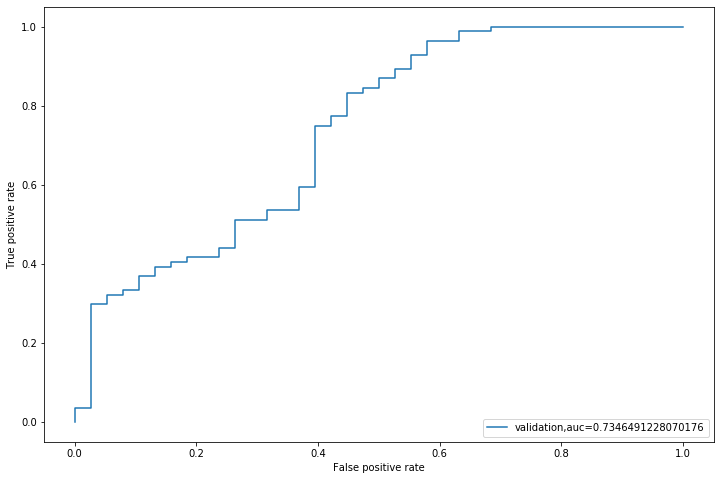

In [50]:
from sklearn import metrics

fpr,tpr, _ = metrics.roc_curve(yv1,pred)
auc = metrics.roc_auc_score(yv1,pred)
plt.figure(figsize = (12,8))
plt.plot(fpr,tpr,label='validation,auc='+str(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()

We got an auc value of 0.73

## Feature Engineering

In [51]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome']+test['CoapplicantIncome']

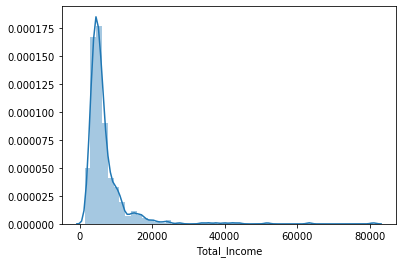

In [52]:
sns.distplot(train['Total_Income'])

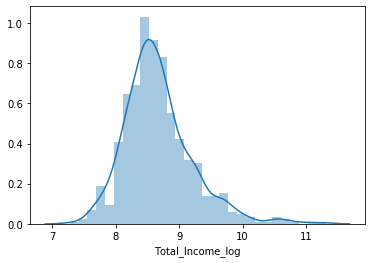

In [53]:
#AS it is shifted to left, we can apply log transformation and make this a normal distribution.

train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])

Lets create the EMI feature now

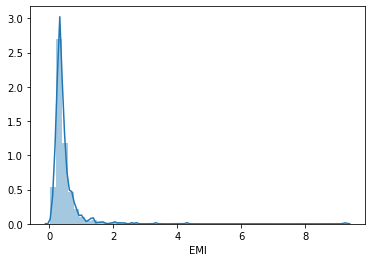

In [54]:
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']
sns.distplot(train['EMI'])

Lets create a balance Income feature now

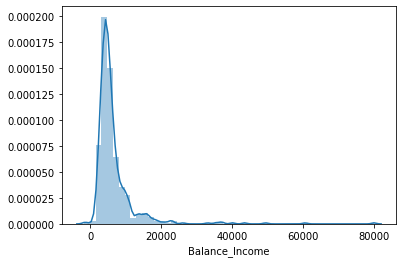

In [55]:
train['Balance_Income'] = train['Total_Income'] - (train['EMI']*1000) #Multiply with 1000 to make the units equal
test['Balance_Income'] = test['Total_Income'] - (test['EMI']*1000)

sns.distplot(train['Balance_Income'])

Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.



In [56]:
train = train.drop (['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test = test.drop (['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

After creating new features, we can continue the model building process. So we will start with logistic regression model and then move over to more complex models like RandomForest and XGBoost.

We will build the following models in this section.

• Logistic Regression

• Decision Tree

• Random Forest

• XGBoost

In [57]:
#Lets prepare the data for feeding into models.

X = train.drop('Loan_Status',1)
y = train.Loan_Status #save target variable in separate dataset

### Logistic Regression

In [58]:
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index,test_index in kf.split(X,Y): 
    print('\n{} of KFold{}'.format(i,kf.n_splits))
    xtr,xv1 = X.iloc[train_index],X.iloc[test_index]
    ytr,yv1 = Y.iloc[train_index],Y.iloc[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xv1)
    score = accuracy_score(yv1,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xv1)[:,1]


1 of KFold5
accuracy_score 0.7886178861788617

2 of KFold5
accuracy_score 0.6910569105691057

3 of KFold5
accuracy_score 0.6666666666666666

4 of KFold5
accuracy_score 0.7804878048780488

5 of KFold5
accuracy_score 0.680327868852459


The mean validation accuracy for this model is 0.719

In [59]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

#As we need predicitons in Y and N we will replace them is submission dataset

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('log2.csv')

For this submission we got an accuracy of 0.71. So we can infer that feature engineering has not improved the the model. Lets look at some other algorithms

## Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier 

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index,test_index in kf.split(X,Y): 
    print('\n{} of KFold{}'.format(i,kf.n_splits))
    xtr,xv1 = X.iloc[train_index],X.iloc[test_index]
    ytr,yv1 = Y.iloc[train_index],Y.iloc[test_index]
    
    model = DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xv1)
    score = accuracy_score(yv1,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xv1)[:,1]


1 of KFold5
accuracy_score 0.7398373983739838

2 of KFold5
accuracy_score 0.6991869918699187

3 of KFold5
accuracy_score 0.7560975609756098

4 of KFold5
accuracy_score 0.7073170731707317

5 of KFold5
accuracy_score 0.6721311475409836


The mean Validation accuracy for this model is 0.714

In [61]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

#As we need predicitons in Y and N we will replace them is submission dataset

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision.csv')

## Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index,test_index in kf.split(X,Y): 
    print('\n{} of KFold{}'.format(i,kf.n_splits))
    xtr,xv1 = X.iloc[train_index],X.iloc[test_index]
    ytr,yv1 = Y.iloc[train_index],Y.iloc[test_index]
    
    model = RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    pred_test = model.predict(xv1)
    score = accuracy_score(yv1,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xv1)[:,1]


1 of KFold5
accuracy_score 0.8292682926829268

2 of KFold5
accuracy_score 0.8130081300813008

3 of KFold5
accuracy_score 0.7723577235772358

4 of KFold5
accuracy_score 0.8048780487804879

5 of KFold5
accuracy_score 0.7540983606557377


The mean validation accuracy for this model is 0.794

We will try to improve the accuracy by tuning the hyperparamters of this model. We will use Grid Search to get the optimized values of hyper-paramters. Grid Search is a way to select the best of a family of hyper parameters, parameterized by a grid of parameters

In [63]:
from sklearn.model_selection import GridSearchCV

# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list (range (1, 20, 2)), 
             'n_estimators': list (range (1, 200, 20))}

grid_search=GridSearchCV (RandomForestClassifier(random_state=1),paramgrid)

from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

# Fit the grid search model grid_search.fit(x_train,y_train)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [64]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)

So the optimized value for the max_depth is 5 and for n_estimator is 41. Now lets build the model using optimized paramters.

In [65]:
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index,test_index in kf.split(X,Y): 
    print('\n{} of KFold{}'.format(i,kf.n_splits))
    xtr,xv1 = X.iloc[train_index],X.iloc[test_index]
    ytr,yv1 = Y.iloc[train_index],Y.iloc[test_index]
    
    model = RandomForestClassifier(random_state=1,max_depth=5,n_estimators = 41)
    model.fit(xtr,ytr)
    pred_test = model.predict(xv1)
    score = accuracy_score(yv1,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xv1)[:,1]


1 of KFold5
accuracy_score 0.8211382113821138

2 of KFold5
accuracy_score 0.8373983739837398

3 of KFold5
accuracy_score 0.7804878048780488

4 of KFold5
accuracy_score 0.7804878048780488

5 of KFold5
accuracy_score 0.7868852459016393


The mean accuracy for this model is 0.81

In [66]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

#As we need predicitons in Y and N we will replace them is submission dataset

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)


pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('RandomForest.csv')

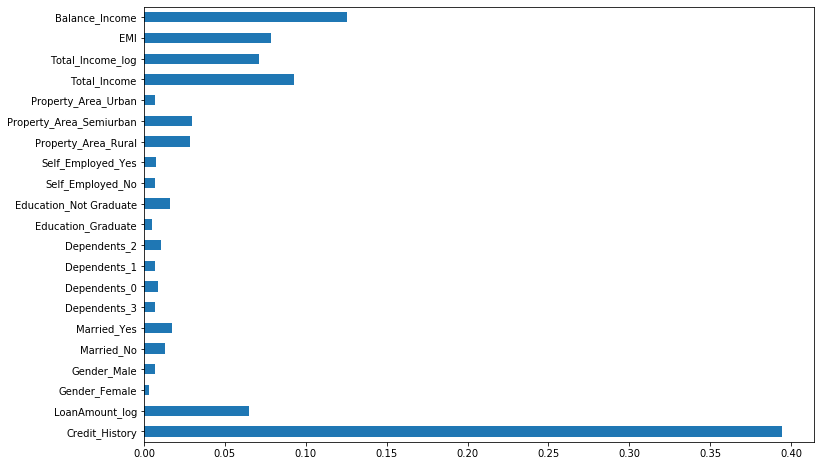

In [67]:
#Let us find the feature importance now

importances = pd.Series(model.feature_importances_, index = X.columns)
importances.plot(kind='barh', figsize=(12,8))

We can see that most important factor for Loan Approval is Credit History followed by Balance Income and the Total income, EMI. So, feature engineering helped us in predicting our target variable 

## XGBoost

In [68]:
import xgboost as xg

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index,test_index in kf.split(X,Y): 
    print('\n{} of KFold{}'.format(i,kf.n_splits))
    xtr,xv1 = X.iloc[train_index],X.iloc[test_index]
    ytr,yv1 = Y.iloc[train_index],Y.iloc[test_index]
    model = xg.XGBClassifier(max_depth=5,n_estimators = 41)
    model.fit(xtr,ytr)
    pred_test = model.predict(xv1)
    score = accuracy_score(yv1,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xv1)[:,1]


1 of KFold5
[18:07:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.7723577235772358

2 of KFold5
[18:07:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.7317073170731707

3 of KFold5
[18:07:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you

The mean accuracy for this model is 0.758

In [70]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

#As we need predicitons in Y and N we will replace them is submission dataset

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)


pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XG.csv')

Model Accuracies:
    
    Logistic Regression: 0.8
    Decision :0.71
    Random Forest: 0.815
    XGBoost: 0.76


Afer trying and testing 4 different algorithms, the best accuracy is Random Forest(0.815) followed by Logistic Regression(0.8)